In [17]:
import keras
import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, LayerNormalization, Flatten, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.layers import Dense, Dropout
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input, GlobalMaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
print("Keras: %s"%keras.__version__)
from keras.models import Model


# model.add(Dense(256, activation='relu')) # Dense 输出256维度
# model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu')) # Dense 输出65维度
# model.add(Dropout(0.1))
# model.add(Dense(1, activation='linear'))

Keras: 2.4.3


In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

数据按照输出分成三份

In [10]:
import pandas as pd
df1 = pd.read_excel("test_data.xlsx")
df2 =pd.read_excel("train_data.xlsx")
df3=df2[['SMILES','BRD4-BD1','Class','Unit']][df2['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df4=df1[['SMILES','BRD4-BD1','Class','Unit']][df1['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df3.loc[df3['Unit']=='nM',['BRD4-BD1']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nM',['Unit']] ='uM'
df3.loc[df3['Unit']=='nmol/L',['BRD4-BD1']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nmol/L',['Unit']] ='uM'
df4.loc[df4['Unit']=='nM',['BRD4-BD1']] /=1000 # 测试样本
df4.loc[df4['Unit']=='nM',['Unit']] ='uM'
df4=df4.reset_index()
df3 =df3.reset_index()
df3.to_csv(r'./train_BD1.csv',index=False,sep=',')  #重新保存
df4.to_csv(r'./test_BD1.csv',index=False,sep=',') #重新保存

<ipython-input-10-080b5a63708a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[['SMILES','BRD4-BD1','Class','Unit']][df2['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
<ipython-input-10-080b5a63708a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4=df1[['SMILES','BRD4-BD1','Class','Unit']][df1['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()


In [12]:
df1 = pd.read_excel("test_data.xlsx")
df2 =pd.read_excel("train_data.xlsx")
df3=df2[['SMILES','BRD4-BD2','Class','Unit']][df2['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df4=df1[['SMILES','BRD4-BD2','Class','Unit']][df1['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df3.loc[df3['Unit']=='nM',['BRD4-BD2']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nM',['Unit']] ='uM'
df3.loc[df3['Unit']=='nmol/L',['BRD4-BD2']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nmol/L',['Unit']] ='uM'
df4.loc[df4['Unit']=='nM',['BRD4-BD2']] /=1000 # 测试样本
df4.loc[df4['Unit']=='nM',['Unit']] ='uM'
df4=df4.reset_index()
df3 =df3.reset_index()
# df3.to_csv(r'./train_BD2.csv',index=False,sep=',')  #重新保存
# df4.to_csv(r'./test_BD2.csv',index=False,sep=',') #重新保存

<ipython-input-12-1418eade5995>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[['SMILES','BRD4-BD2','Class','Unit']][df2['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
<ipython-input-12-1418eade5995>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4=df1[['SMILES','BRD4-BD2','Class','Unit']][df1['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()


In [19]:
df1 = pd.read_excel("test_data.xlsx")
df2 =pd.read_excel("train_data.xlsx")
df3=df2[['SMILES','BRD4-BD1','BRD4-BD2','Class','Unit']][df2['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df4=df1[['SMILES','BRD4-BD1','BRD4-BD2','Class','Unit']][df1['BRD4-BD1'].apply(lambda x : type(x)==float)][df1['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
df3.loc[df3['Unit']=='nM',['BRD4-BD2']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nM',['Unit']] ='uM'
df3.loc[df3['Unit']=='nmol/L',['BRD4-BD2']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nmol/L',['Unit']] ='uM'
df4.loc[df4['Unit']=='nM',['BRD4-BD2']] /=1000 # 测试样本
df4.loc[df4['Unit']=='nM',['Unit']] ='uM'
df3.loc[df3['Unit']=='nM',['BRD4-BD1']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nM',['Unit']] ='uM'
df3.loc[df3['Unit']=='nmol/L',['BRD4-BD1']] /=1000  # 训练样本
df3.loc[df3['Unit']=='nmol/L',['Unit']] ='uM'
df4.loc[df4['Unit']=='nM',['BRD4-BD1']] /=1000 # 测试样本
df4.loc[df4['Unit']=='nM',['Unit']] ='uM'
df4=df4.reset_index()
df3 =df3.reset_index()
df3.to_csv(r'./train_BD1BD2.csv',index=False,sep=',')  #重新保存
df4.to_csv(r'./test_BD1BD2.csv',index=False,sep=',') #重新保存

<ipython-input-19-fad7507a4a4b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[['SMILES','BRD4-BD1','BRD4-BD2','Class','Unit']][df2['BRD4-BD1'].apply(lambda x : type(x)==float)][df2['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()
<ipython-input-19-fad7507a4a4b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4=df1[['SMILES','BRD4-BD1','BRD4-BD2','Class','Unit']][df1['BRD4-BD1'].apply(lambda x : type(x)==float)][df1['BRD4-BD2'].apply(lambda x : type(x)==float)][df2['Class'].apply(lambda x:x=="IC50")].dropna()


PermissionError: [Errno 13] Permission denied: './train_BD1BD2.csv'

In [32]:
import numpy as np
import pandas as pd
train_df = pd.read_csv("train_BRD4-BD1.csv")
test_df =pd.read_csv("test_BRD4-BD1.csv")
X_train_smiles = np.array(list(train_df["SMILES"]))
X_train_smiles[0:5]

array(['NS(=O)(=O)C1=CC=C(NC2=NC3=C(C=CC=C3)C(C3=CC=C(Cl)C=C3)=N2)C=C1',
       'NS(=O)(=O)C1=CC=CC=C1NC1=NC2=C(C=CC=C2)C(C2=CC=C(Cl)C=C2)=N1',
       '[H]C1=CC=C2N=C(NC3=CC=C(S(N)(=O)=O)C=C3)N=C(C3=CC=C(Br)C=C3)C2=C1',
       '[H]C1=CC=C2N=C(NC3=CC=C(S(N)(=O)=O)C=C3)N=C(C3=CC=C(F)C=C3)C2=C1',
       '[H]C1=CC=C2N=C(NC3=CC=CC=C3S(N)(=O)=O)N=C(C3=CC=C(F)C=C3)C2=C1'],
      dtype='<U92')

训练标签

In [35]:
assay1 = "BRD4-BD1" 
Y_train = train_df[assay1].values
Y_train = np.array(Y_train)
print(Y_train.shape)
print(Y_train[0])

(185,)
3.371


In [3]:
import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, LayerNormalization, Flatten, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.layers import Dense, Dropout
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.utils import shuffle
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input, GlobalMaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
print("Keras: %s"%keras.__version__)

Keras: 2.4.3


In [11]:
"""为出现的字符构建字典"""
dic_df = pd.read_csv("train_check.csv")
charset = set("".join(list(dic_df.SMILES))+"!E")
"""为字符构建索引"""
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in dic_df.SMILES]) + 5 # 最长的len(smile)
print (str(charset))
print(len(charset), embed)
char_to_int
for key,val in char_to_int.items():
    # print(f"'{key}'",":",val)
    print(key,end=' ')

{'@', '(', 'M', 'C', 'O', '+', '=', '2', 'S', 'l', '4', '#', '!', 'N', '5', '1', ']', 'r', 'H', '[', '*', '-', '3', 'B', ')', 'F', 'g', 'E'}
28 97
@ ( M C O + = 2 S l 4 # ! N 5 1 ] r H [ * - 3 B ) F g E 

In [12]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        # 为所有数据生成形状为（embed，len(charset))的onehot编码,
        for i,smile in enumerate(smiles):
            #encode the start char 开始编码为！
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar 结束编码为 E
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
vocab_size=len(charset)
vocab_size

28

In [14]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [18]:
from keras import optimizers
optimizer = Adam(lr=0.0001)
lr_metric = get_lr_metric(optimizer)


In [19]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=embed-1)) # embeding 
model.add(keras.layers.Conv1D(512,10,activation='relu')) # Conv1D
model.add(LayerNormalization())
model.add(keras.layers.Conv1D(256,5,activation='relu'))
model.add(keras.layers.Conv1D(128,3,activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu')) # Dense 输出256维度
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu')) # Dense 输出65维度
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.compile(loss="mse", optimizer=optimizer, metrics=[coeff_determination, lr_metric])

In [20]:
callbacks_list = [
    EarlyStopping(monitor="val_loss",patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-15, verbose=1, mode='auto',cooldown=0),
    ModelCheckpoint(filepath="weights.best.hdf5", monitor='val_loss', save_best_only=True, verbose=1, mode='auto')
    
]

In [36]:
from sklearn.model_selection import KFold
from copy import deepcopy
from keras import backend as K #转换为张量
kf = KFold(n_splits=5,shuffle=True,random_state=7)
hist=[]
score =[]
model_list =[]
def train(X_train_smiles,Y_train_smiles):
        for train_index, test_index in kf.split(X_train_smiles):
                X_train,X_test = X_train_smiles[train_index],X_train_smiles[test_index]
                Y_train,Y_test =Y_train_smiles [train_index],Y_train_smiles[test_index]
        # X_train_smiles,Y_train,X_test_smiles,Y_test = next(get_data(X_train_smiles,Y_train))
                X_train, _ = vectorize(X_train)
                X_test, _ = vectorize(X_test)
                X_train = K.cast_to_floatx(X_train)
                Y_train = K.cast_to_floatx(Y_train)
                history =model.fit(x=np.argmax(X_train, axis=2), y=Y_train,
                                batch_size=32,
                                epochs=100,
                                validation_data=(np.argmax(X_test, axis=2),Y_test),
                                callbacks=callbacks_list)
                hist.append(history)
# print(Y_test[0:5],predict_test[0:5])
                scores = model.evaluate(np.argmax(X_test, axis=2), Y_test, verbose=0)
                score.append(scores)
                print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        # mol_str_train=[]
        # mol_str_test=[]
       
        # """ 参数是训练和测试集的数量"""
        # for x in range(X_train.shape[0]):
        #     mol_str_train.append("".join([int_to_char[idx] for idx in np.argmax(X_train[x,:,:], axis=1)]))
        # for x in range(X_test.shape[0]):
        #     mol_str_test.append("".join([int_to_char[idx] for idx in np.argmax(X_test[x,:,:], axis=1)]))
train(X_train_smiles=X_train_smiles,Y_train_smiles=Y_train)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 49.5904 - coeff_determination: -0.1308 - lr: 6.1035e-09
Epoch 00001: val_loss did not improve from 0.00150
5/5 [==============================] - 1s 260ms/step - loss: 49.5904 - coeff_determination: -0.1308 - lr: 6.1035e-09 - val_loss: 155.1076 - val_coeff_determination: -0.2128 - val_lr: 6.1035e-09
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 49.5587 - coeff_determination: -0.1677 - lr: 6.1035e-09
Epoch 00002: val_loss did not improve from 0.00150
5/5 [==============================] - 1s 226ms/step - loss: 49.5587 - coeff_determination: -0.1677 - lr: 6.1035e-09 - val_loss: 155.0919 - val_coeff_determination: -0.2126 - val_lr: 6.1035e-09
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 50.2881 - coeff_determination: -0.1177 - lr: 6.1035e-09
Epoch 00003: val_loss did not improve from 0.00150
5/5 [==============================] - 1s 228ms/step - loss: 50.2881 - coeff_determination

<ipython-input-37-aa1a69282044>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221)
<ipython-input-37-aa1a69282044>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(222)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.

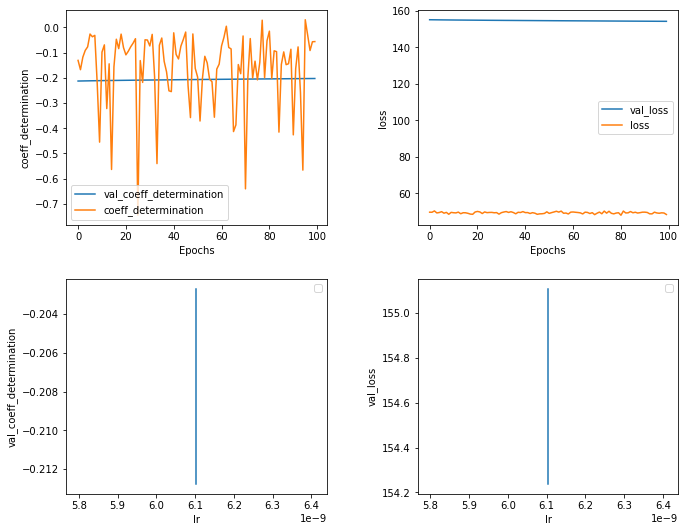

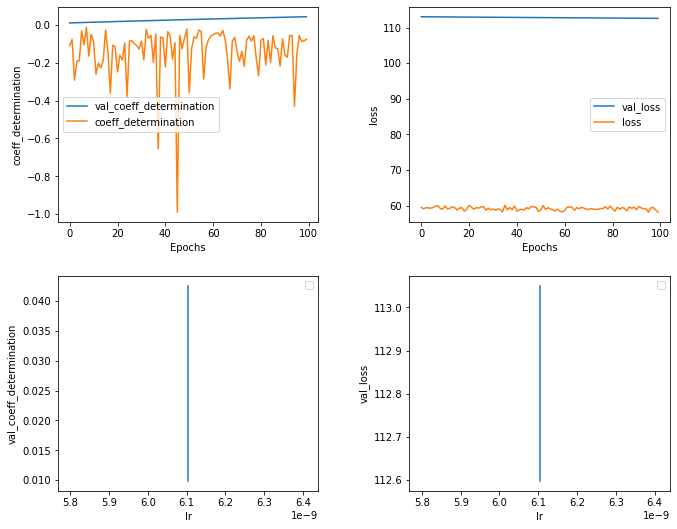

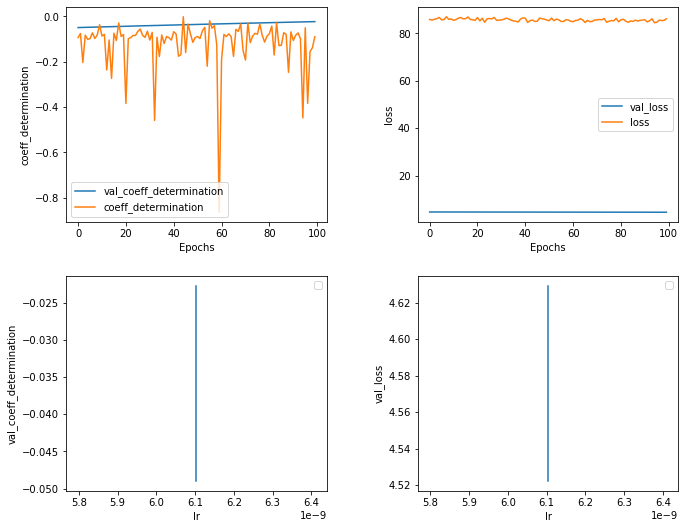

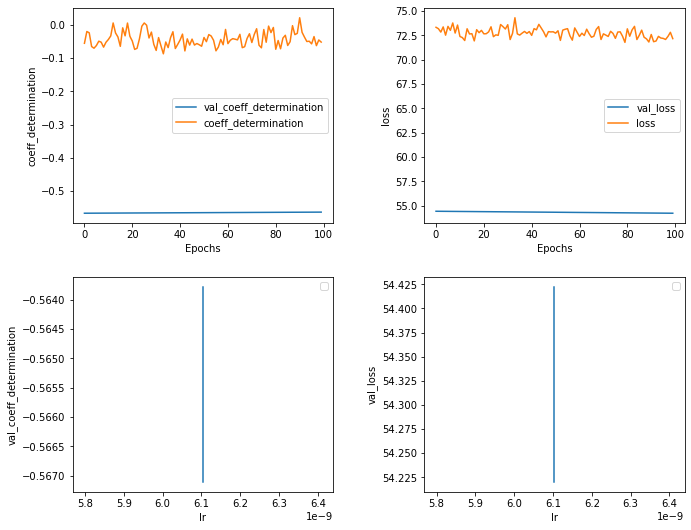

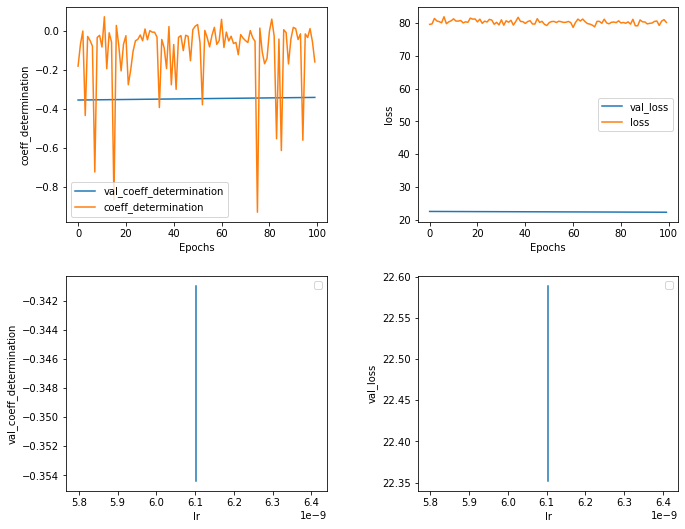

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

# hist = hist[0].history
for history in hist:
    hist = history.history
    plt.figure(figsize=(10, 8))

    for label in ['val_coeff_determination','coeff_determination']:
        plt.subplot(221)
        plt.plot(hist[label], label = label)
        plt.legend()
        plt.xlabel("Epochs")
        plt.ylabel("coeff_determination")

    for label in ['val_loss','loss']:
        plt.subplot(222)
        plt.plot(hist[label], label = label)
        plt.legend()
        plt.xlabel("Epochs")
        plt.ylabel("loss")



    plt.subplot(223)
    plt.plot( hist['lr'],hist['val_coeff_determination']  )
    plt.legend()
    plt.xlabel("lr")
    plt.ylabel("val_coeff_determination")


    plt.subplot(224)
    plt.plot( hist['lr'],hist['val_loss']  )
    plt.legend()
    plt.xlabel("lr")
    plt.ylabel("val_loss")


    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

In [39]:
X_test_smiles = np.array(list(test_df["SMILES"]))
X_test, _ = vectorize(X_test_smiles)
Y_test = test_df[assay1].values.reshape(-1,1)
Y_test =np.array(Y_test)
print(Y_test.shape)

(32, 1)


In [41]:
predict_test= model.predict(x=np.argmax(X_test, axis=2))
# print(Y_test[0:5],predict_test[0:5])
cnt_5 =0
print("model:")
for num in (abs(predict_test-Y_test)) :
    if num<=5:
        cnt_5+=1
print(cnt_5)
cnt_3=0
for num in (abs(predict_test-Y_test)) :
    if num<=3:
        cnt_3+=1
print(cnt_3)
cnt_1=0
for num in (abs(predict_test-Y_test)) :
    if num<=1:
        cnt_1+=1
print(cnt_1)

model:
31
30
22
